In [4]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [5]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-41-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Feb 01 2021 11:29:55CET



## Load of the test data

In [6]:
from process import loaddata
regr_data = loaddata("../data/regression/250.csv")
class_data = loaddata("../data/classifier/250.csv")

### Classicafication data

In [7]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

### Regression data

In [8]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

### Classicafication and Regression data

In [9]:
np.random.shuffle(class_data)
y = class_data[:,-7:-4]
x = class_data[:,1:7]

In [10]:
print('Classifaction data shape:',xc_test.shape) 
print('Regression data shape:',xr_test.shape) 
print('Classifcation and Regression data shape:',xr_test.shape) 

Classifaction data shape: (334438, 10)
Regression data shape: (167219, 6)
Classifcation and Regression data shape: (167219, 6)


## Model Build

In [11]:
from tensorflow import keras 

In [12]:
model = keras.models.load_model('../models/classificationandregression/large_mse250.h5') 
model_regr = keras.models.load_model('../models/regression/large_mse250.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

## Test of the Classification NN

In [13]:
model_class.fit(xc_test, yc_test)

10452/10452 [==============================] - 14s 1ms/step - loss: 0.1788 - accuracy: 0.9397


## Test of the Regression NN

In [14]:
model_regr.fit(xr_test, yr_test)

5226/5226 [==============================] - 10s 2ms/step - loss: 0.0021 - mae: 0.0108


## Test of the Classification&Regression NN

In [15]:
model.fit(x, y)

10452/10452 [==============================] - 20s 2ms/step - loss: 7.9651e-06 - mae: 0.0023


## Test spectrum

In [16]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [17]:
final_p = []
final_e = []
final_e_rc = []
for regr_pair in regr_data:
    final_p.append(np.linalg.norm(regr_pair[13:16]))
for class_data in class_data:
    final_e_rc.append(np.linalg.norm(class_data[1:7]))

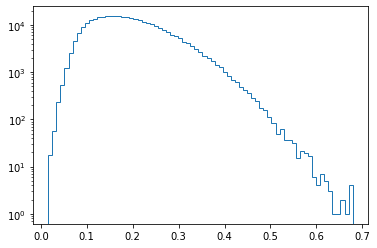

In [18]:
energy_spectrum(final_e_rc, 75)

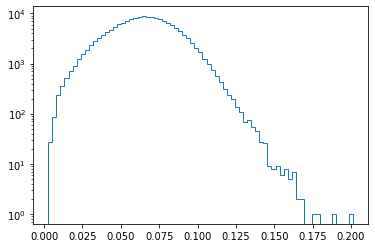

In [19]:
energy_spectrum(final_p, 75)

In [20]:
photon_final_nn = []
threshold = 0.5
for i, x in enumerate(xc_test[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(xc_test) * 100))
    x = np.array([x])
    classification = model_class.predict(np.stack(x))
    if classification >= threshold:
        regr_x = np.array([x[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.029900908389596876%


In [ ]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(0.05*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

In [ ]:
energy_spectrum(photon_final_nn, 75)

In [ ]:
photon_final_nn

In [ ]:
plt.hist(photon_final_nn, 50, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 90, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()

In [ ]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

In [ ]:
mean_nn,std_nn=norm.fit(photon_final_nn)
plt.hist(photon_final_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [ ]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(photon_final_nn))

In [ ]:
mean_p,std_p=norm.fit(final_p)
plt.hist(final_p, bins=100, alpha = 0.5, label='Photon Momentum from simulations', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_p, std_p)
plt.plot(x, y,'r--', linewidth=2)
plt.show()

In [ ]:
print('mean = ', mean_p)
print('std = ', std_p)
print("chi square = ", stats.chisquare(photon_final_nn))

In [ ]:
plt.hist(photon_final_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_p, bins=100, alpha = 0.5, label='Photon Momentum from simulations', density = True)
xmin, xmax = plt.xlim()
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth=2)
plt.legend(loc='upper right')
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean_p, std_p)
plt.plot(x_p, y_p, 'g:', label = 'fit Photon Momentum Simulations', linewidth=2)
plt.legend(loc='upper right')
plt.ylim((0, 35))
plt.show()

In [21]:
from tensorflow import keras 
final_e_nn = []
num = int(0.05*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_[1:7]])
    result_rc = model.predict(x_)
    final_e_nn.append(np.linalg.norm(result_rc))
    bar.update(i+1)
bar.finish()

[===============================================================] 100% of 16721


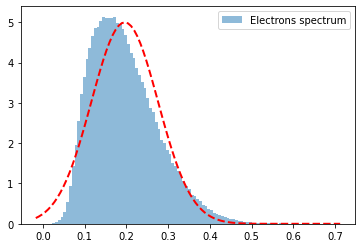

In [22]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e_rc)
plt.hist(final_e_rc, bins=100, alpha = 0.5, label='Electrons spectrum', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [23]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_e_rc))

mean =  0.19602051234655088
std =  0.07985361146457635
chi square =  Power_divergenceResult(statistic=10879.356854561302, pvalue=1.0)


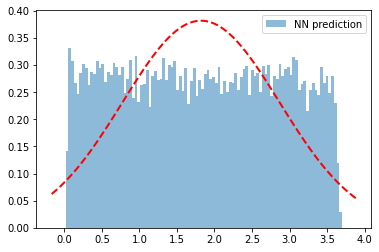

In [24]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [25]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(electron_final_nn))

mean =  1.821292
std =  1.0448797


NameError: name 'electron_final_nn' is not defined

In [ ]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_e_rc, bins=100, alpha = 0.5, label='Electron Momentum from simulations', density = True)
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_e = np.linspace(xmin, xmax, 100)
y_e = norm.pdf(x_e, mean, std)
plt.plot(x_e, y_e, 'g:', label = 'fit Electron Momentum Simulations', linewidth = 2)
plt.legend(loc = 'upper right')
plt.ylim((0, 30))
plt.savefig('Fit_250train_250test.png')
plt.show()